In [1]:
%%HTML
<style>


.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}

</style>

In [2]:
## For debbugging
%load_ext autoreload

# import os
import sys
from pathlib import Path
module_path = Path('.').resolve().parents[1]
if module_path not in sys.path:
    sys.path.append(str(module_path))

In [3]:
%aimport mlp.kex
%aimport mlp.tree
%aimport mlp.plot
%autoreload 1
from mlp import kex
from mlp.tree import node_adj_mat, tag_network, tag_df_network
from mlp.plot import hv_net
from bokeh.palettes import Viridis10, Category10_6
import networkx as nx

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def set_style():
    sns.set_context("talk")
#     sns.set(font='serif')
    sns.set_style("white" 
#         {"font.family": "serif",
#          "font.serif": ["Times", "Palatino", "serif"]}
                 )

set_style()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
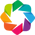

In [6]:
import holoviews as hv
hv.extension('bokeh')

%opts Graph [width=600 height=400]

# Automated Tagging of Maintenance Issues:
## A Keyword Detection and Ranking Case-Study
### Thurston Sexton + Mike Brundage


# Manufacturing Maintenance Case Study
 Thurston Sexton + Mike Brundage

### Import Data
First we will merge any text columns and clean them (lower-case, remove stop-words and punctuation, etc). 

In [7]:
data_dir = module_path/'data'/'gs_data'
df = pd.read_csv(data_dir/'gs_data.csv')
df['DATE RECEIVED'] = pd.DatetimeIndex(df['DATE RECEIVED'])
# merge and cleanse NLP-containing columns of the data
gs_nlp_select = kex.NLPSelect(columns = ['Description', 'Resolution'])
raw_text = gs_nlp_select.transform(df)

tex = kex.TokenExtractor()
toks = tex.fit_transform(raw_text)

vocab_fname = data_dir/'vocab.csv' 
vocab = kex.generate_vocabulary_df(tex, init=vocab_fname)
tags_df = kex.tag_extractor(tex, raw_text, vocab_df=vocab)

### Extract Keywords

intialized successfully!
intialized successfully!


In [8]:

tags_read = kex._get_readable_tag_df(tags_df)

In [9]:
tags_read.join(df[['Description', 'Resolution']]).head(5)

I       P                  S      U X  \
0                 chain, feeder  broken             repair    bar     
1  machine, cable, pin, pendant   short           replaced  power     
2                          part  broken      repair, order            
3                   accumulator          check, charge, ok            
4    hydraulic, saw, attachment    leak           replaced   seal     

                   Description  \
0      Broken bar feeder chain   
1                     No power   
2    Smartscope harness broken   
3  Check / Charge Accumulators   
4    Hyd leak at saw atachment   

                                          Resolution  
0                                           Repaired  
1  Replaced pin in pendant and powered machine -P...  
2                      Parts ordered / Tech repaired  
3                                           Where OK  
4  Replaced seal in saw attachment but still leak...

In [10]:
# how many instances of each keyword class are there?
print('named entities: ')
print('I\tItem\nP\tProblem\nS\tSolution\nR\tRedundant')
print('U\tUnknown\nX\tStop Word')
print('tagged tokens: ', vocab[vocab.NE!=''].NE.notna().sum())
print('total tags: ', vocab.groupby("NE").nunique().alias.sum())
vocab.groupby("NE").nunique()

named entities: 
I	Item
P	Problem
S	Solution
R	Redundant
U	Unknown
X	Stop Word
tagged tokens:  671
total tags:  298


NE  alias  notes  score
NE                         
     1      2      1   2287
I    1    146      8    353
P    1     26      1     77
S    1     29      1    105
U    1     91      7    130
X    1      4      1      4

Tag completeness: 0.76 +/- 0.19
Complete Docs: 789, or 22.95%
Empty Docs: 15, or 0.44%


/home/tbsexton/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


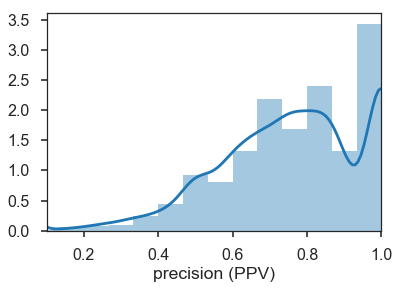

In [12]:
# tag-completeness of work-orders?
tag_pct, tag_comp, tag_empt = kex._get_tag_completeness(tags_df)


with sns.axes_style('ticks') as style,\
sns.plotting_context('poster') as context:
    sns.distplot(tag_pct.dropna(), bins=15, kde_kws={'cut':0})
    plt.xlim(0.1, 1.0)
    plt.xlabel('precision (PPV)')


In [13]:
replaced_text = kex.token_to_alias(raw_text, vocab)  # raw_text, with token-->alias replacement
tex2 = kex.TokenExtractor(ngram_range=(2, 2))  # new extractor (note 2-gram)
toks2 = tex2.fit_transform(replaced_text)

#make 2-gram dictionary
vocab2_fname = data_dir/'2g_vocab.csv'
vocab2 = kex.generate_vocabulary_df(tex2, init=vocab2_fname)

# extract 2-gram tags from cleaned text
tags2_df = kex.tag_extractor(tex2, replaced_text, vocab_df=vocab2)

intialized successfully!
intialized successfully!


In [14]:
## experimental: we need [item_item action] 2-grams, so let's use 2-gram Items for a 3rd pass...
tex3 = kex.TokenExtractor(ngram_range=(1,2))
mask = (np.isin(vocab2.NE, ['I', 'P', 'S'])) & (vocab2.alias!='')
vocab_combo = pd.concat([vocab, vocab2[mask]])
vocab_combo['score'] = 0

# keep just in case of duplicates
vocab_combo = vocab_combo.reset_index().drop_duplicates(subset=['tokens']).set_index('tokens')

replaced_text2 = kex.token_to_alias(replaced_text, vocab_combo)
# print(replaced_text2)
toks3 = tex3.fit_transform(replaced_text2)
# print(toks3)
# define rules
NE_map = {'I I': 'I',  # two items makes one new item
          'I P': 'P I', 'I S': 'S I', 'P I': 'P I', 'S I': 'S I',  # order-free 
          'P P': 'X', 'P S': 'X', 'S P': 'X', 'S S': 'X'}  # redundancies
NE_types = 'IPSUX'

#make 2-gram dictionary
vocab3 = kex.generate_vocabulary_df(tex3)
vocab3 = kex.ngram_automatch(vocab_combo, vocab3, NE_types, NE_map)

# extract 2-gram tags from cleaned text
tags3_df = kex.tag_extractor(tex3, replaced_text2, vocab_df=vocab3)

intialized successfully!


In [15]:
# merge 1 and 2-grams?
tag_df = tags_df.join(tags3_df.drop(axis='columns', labels=tags_df.columns.levels[1].tolist(), level=1))
relation_df = tag_df.loc[:, ['P I', 'S I']]

# tag_df = tags_df.copy()

tags_read = kex._get_readable_tag_df(tag_df)
tag_df = tag_df.loc[:, ['I', 'P', 'S', 'U']]    
    

/home/tbsexton/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2530: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [16]:
tags_read.head()

I       P                P I  \
0  chain, feeder, bar_feeder, bar_feeder chain  broken  broken bar_feeder   
1  machine, cable, pin, pendant, pendant cable   short                      
2                                         part  broken                      
3                                  accumulator                              
4   hydraulic, saw, attachment, saw attachment    leak     hydraulic leak   

                   S                                 S I      U             X  
0             repair                        chain repair    bar                
1           replaced                        replaced pin  power                
2      repair, order                                                           
3  check, charge, ok  charge accumulator, accumulator ok         check charge  
4           replaced                 attachment replaced   seal

## Measuring Machine Performance

In [17]:
colors = {
            'P':'#C0504D',
            'S':'#7ABC32',
            'I':'#4F81BD',
            'U':'#ffc000',
            'NA':'gray',
            'X':'black'
        }

### Failure Inter-arrival Times, by Machine

<Figure size 360x720 with 0 Axes>

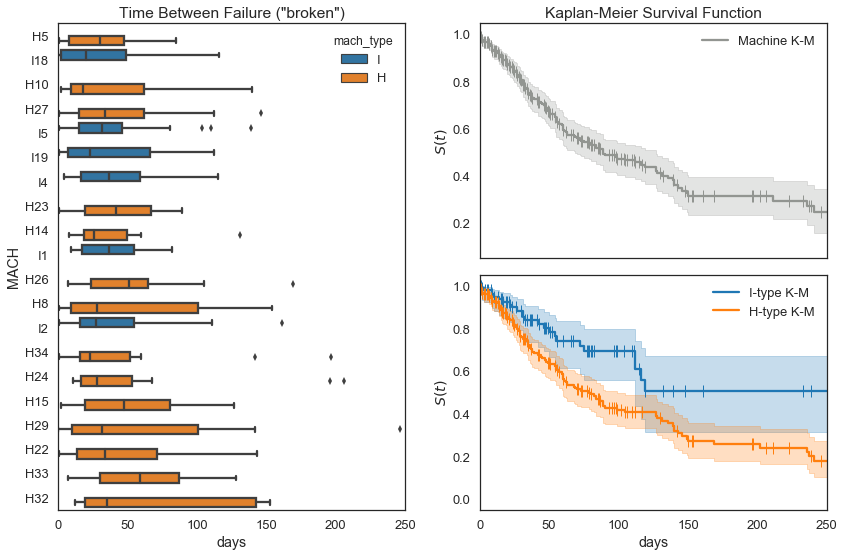

In [34]:
import warnings
warnings.simplefilter(action='ignore')

# samp = ['broken', 'motor' ]
h_or_i = df.MACH.str.match(r'^[HI][0-9]*$').fillna(False)
is_broke = (tag_df.P['broken']>0)
# df.MACH[h_or_i]
cond = h_or_i & is_broke

idx_col = pd.DatetimeIndex(df['DATE RECEIVED'])
# cond = (tag_df.P['broken']>0)#|(tag_df.S['replace']>0)
sample_tag = tag_df.loc[cond,tag_df.loc[cond].sum()>1]

sample_tag.columns = sample_tag.columns.droplevel(0)

sample_tag = pd.concat([sample_tag, df.MACH[cond]], axis=1)
sample_tag['date'] = idx_col[cond]
sample_tag.loc[:,'mach_type'] = sample_tag.MACH.str[0]#.astype('category')
sample_tag['tbf'] = sample_tag.sort_values(['MACH','date']).groupby('MACH')['date'].diff()

sample_tag.loc[:,'tbf'] = sample_tag.tbf/pd.Timedelta(days=1)#.dt.total_seconds() / (24 * 60 * 60)
# (sample_tag.groupby('MACH')['tbf'].sum()/sample_tag.groupby('MACH')['tbf'].count()).sort_values()
sample_tag.mach_type.value_counts()
# sns.boxplot(y='tbf', x='MACH', data=sample_tag.dropna().reset_index())

# sample_tag.dropna(subset=['tbf']).plot(y='tbf', x='MACH', kind='box')
plt.figure(figsize=(5,10))
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# sns.violinplot(data=sample_tag[['mach_type', 'tbf', 'MACH']].dropna(), 
#                y='MACH', x='tbf', hue='mach_type', cut=0, orient='h', scale='count', bw=.4)
samps = sample_tag[['mach_type', 'tbf', 'MACH']].dropna()
# order = samps.groupby('MACH').mean().sort_values('tbf').index
order = samps.MACH.value_counts().index


import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True, figsize=(12,8))
gs = gridspec.GridSpec(2, 2)

# with sns.axes_style('whitegrid') as style,\
# sns.plotting_context('poster') as context:
ax1 = fig.add_subplot(gs[:,0])
sns.boxplot(data=samps, y='MACH', x='tbf', 
            hue='mach_type', orient='h', 
            order=order[:20], notch=False,
           ax = ax1)
plt.xlabel('days');
# plt.xlim(0,4000)
plt.title('Time Between Failure ("broken")')
ax1.set(xlim=(0,250));
    
from lifelines import WeibullFitter, ExponentialFitter, KaplanMeierFitter

def mask_to_ETraw(df_clean, mask, fill_null=1.):
    filter_df = df_clean.loc[mask]
    g = filter_df.sort_values('DATE RECEIVED').groupby('MACH')
    T = g['DATE RECEIVED'].transform(pd.Series.diff)/pd.Timedelta(days=1)

    # assume censored when parts replaced (changeout)
    E = (~(tag_df.S['replaced']>0)).astype(int)[mask]
    T_defined = (T>0.)&T.notna()
    return T[T_defined], E[T_defined]

ax3 = fig.add_subplot(gs[-1,-1])
ax2 = fig.add_subplot(gs[0,-1], sharex=ax3)

T, E = mask_to_ETraw(df, cond)
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E, label='Machine K-M')
kmf.plot(show_censors=True, censor_styles={'marker':'|'}, ax=ax2, color='xkcd:gray')
ax2.set(xlim=(0,250), ylabel=r'$S(t)$', title='Kaplan-Meier Survival Function');


i_ = df.MACH.str.match(r'^[I][0-9]*$').fillna(False)
T, E = mask_to_ETraw(df, i_&is_broke)
kmf.fit(T, event_observed=E, label='I-type K-M')
kmf.plot(show_censors=True, censor_styles={'marker':'|'}, ax=ax3)

h_ = df.MACH.str.match(r'^[H][0-9]*$').fillna(False)
T, E = mask_to_ETraw(df, h_&is_broke)
kmf.fit(T, event_observed=E, label='H-type K-M')
kmf.plot(show_censors=True, censor_styles={'marker':'|'}, ax=ax3)


ax3.set(xlim=(0,250), ylabel=r'$S(t)$', xlabel='days');

Markers ( | ) indicate a _censored_ observation, interpreted as a maintenance event with no replacements (no 'replaced' tag occurrence).

- where "problems" aren't listed, issue is generally routine maintenance. 
- **Assumption**: Problem and Solution tags are almost entirely independent sets. 
- We get a precise list of what *isn't* known for free...the "Unknowns". 

### Top Tag occurences, by Machine

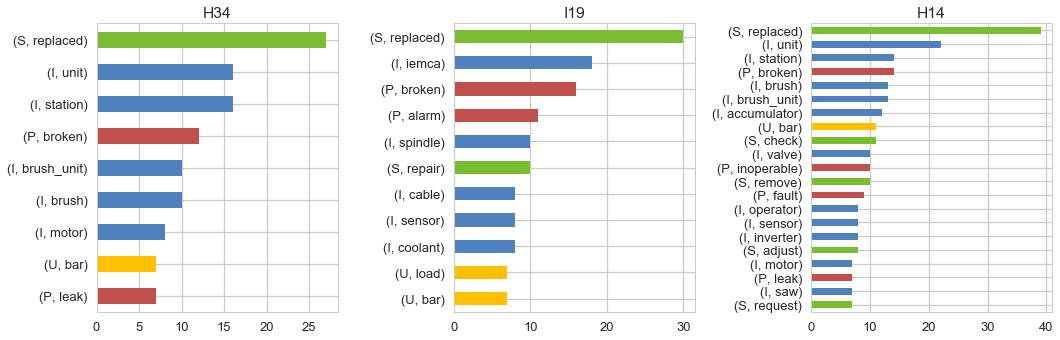

In [124]:
# top3 = sample_tag.MACH.isin(['H34', 'I19', 'H14'])
# sample_tag[top3, sample_tag.loc[top3,:].sum()>3].groupby('MACH').sum().plot(kind='bar')
# tag_df[sample_tag.MACH=='H34'].sum()

def machine_tags(name, n_reps):
    isguy = df['MACH'].str.contains(name, case =False).fillna(False)
    return tag_df.loc[isguy,(tag_df.loc[isguy,:].sum()>n_reps).values]
with sns.axes_style('whitegrid') as style,\
sns.plotting_context('talk') as context:
    f, ax = plt.subplots(ncols=3, figsize=(15, 5))

    for n, mach in enumerate(['H34', 'I19', 'H14']):
        mach_df = machine_tags(mach,  6).sum().sort_values()
        mach_df.plot(kind='barh', color=[colors[i] for i in mach_df.index.get_level_values(0)], ax=ax[n])
        ax[n].set_title(mach)
    plt.tight_layout()

- `H34` issues with `motor`, `brush_unit`
- `I19` `alarm`s and/or `sensors`, potentially coolant-related
- `H14` wide array of issues, including `operator` (!?)

Index(['motor', 'brush_unit'], dtype='object')


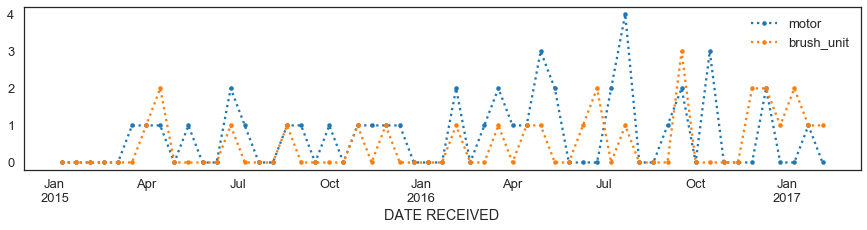

In [125]:
# wo_num = 0
# sample_tag = tag_df.loc[:,tag_df.loc[wo_num].astype(bool)]
is_broke = (tag_df.P['broken']>0)
samp = ['brush_unit', 'motor']
sample_tag = tag_df.loc[is_broke,(slice(None), samp)]
sample_tag.columns = sample_tag.columns.droplevel(0)

# sample_tag = tag_df[['chain', 'bar', 'accumulator']]
sample_tag = sample_tag.set_index(pd.DatetimeIndex(df['DATE RECEIVED'][is_broke]))
# .rolling(1000).sum()
# plt.figure()
sample_tag.resample('2W').sum().plot(figsize=(15,3), marker='.', ls=':')
# df.resample()
print(sample_tag.columns)

#### Machines (Node-link Vizualization)

In [132]:
%%output size=150 backend='bokeh' filename='machs'
%%opts Text (text_align='right')
%%opts Graph (edge_line_width=4 node_line_color='white', node_size=1)
%%opts EdgePaths [color_index='weight'] (line_width=1, cmap='viridis', color='dodgerblue', alpha=.2)
%%opts Overlay [width=300 legend_position='top_right'] Layout [tabs=True]
%%opts Nodes (size='size' line_color='white')
# padding = dict(x=(-0.05, 1.05), y=(-0.05, 1.05))
hv.Text

kws = {'layout':nx.drawing.spring_layout,
#        'layout_kws':{'prog':'neato'} 
       'padding':dict(x=(-0.05, 1.05), y=(-0.05, 1.05))
      }

layout = hv.Layout([hv_net(machine_tags("H34",  5), name='H34',**kws),
                    hv_net(machine_tags("I19",  5), name='I19',**kws),
                    hv_net(machine_tags("H14",  5), name='H14',**kws)
                   ])
layout

:Layout
   .H34.I :Overlay
      .EdgePaths.I :EdgePaths   [x,y]
      .H34.U       :Nodes   [x,y,index]   (count,size,NE)
      .H34.P       :Nodes   [x,y,index]   (count,size,NE)
      .H34.I       :Nodes   [x,y,index]   (count,size,NE)
      .H34.S       :Nodes   [x,y,index]   (count,size,NE)
      .Text.I      :Text   [x,y]
      .Text.II     :Text   [x,y]
      .Text.III    :Text   [x,y]
      .Text.IV     :Text   [x,y]
      .Text.V      :Text   [x,y]
      .Text.VI     :Text   [x,y]
      .Text.VII    :Text   [x,y]
      .Text.VIII   :Text   [x,y]
      .Text.IX     :Text   [x,y]
      .Text.X      :Text   [x,y]
      .Text.XI     :Text   [x,y]
   .I19.I :Overlay
      .EdgePaths.I :EdgePaths   [x,y]
      .I19.P       :Nodes   [x,y,index]   (count,size,NE)
      .I19.U       :Nodes   [x,y,index]   (count,size,NE)
      .I19.I       :Nodes   [x,y,index]   (count,size,NE)
      .I19.S       :Nodes   [x,y,index]   (count,size,NE)
      .Text.I      :Text   [x,y]
      .Text.II     :Text   [x,y]
      .Text.III    :Text   [x,y]
      .Text.IV     :Text   [x,y]
      .Text.V      :Text   [x,y]
      .Text.VI     :Text   [x,y]
      .Text.VII    :Text   [x,y]
      .Text.VIII   :Text   [x,y]
      .Text.IX     :Text   [x,y]
      .Text.X      :Text   [x,y]
      .Text.XI     :Text   [x,y]
      .Text.XII    :Text   [x,y]
      .Text.XIII   :Text   [x,y]
      .Text.XIV    :Text   [x,y]
   .H14.I :Overlay
      .EdgePaths.I :EdgePaths   [x,y]
      .H14.U       :Nodes   [x,y,index]   (count,size,NE)
      .H14.I       :Nodes   [x,y,index]   (count,size,NE)
      .H14.S       :Nodes   [x,y,index]   (count,size,NE)
      .H14.P       :Nodes   [x,y,index]   (count,size,NE)
      .Text.I      :Text   [x,y]
      .Text.II     :Text   [x,y]
      .Text.III    :Text   [x,y]
      .Text.IV     :Text   [x,y]
      .Text.V      :Text   [x,y]
      .Text.VI     :Text   [x,y]
      .Text.VII    :Text   [x,y]
      .Text.VIII   :Text   [x,y]
      .Text.IX     :Text   [x,y]
      .Text.X      :Text   [x,y]
      .Text.XI     :Text   [x,y]
      .Text.XII    :Text   [x,y]
      .Text.XIII   :Text   [x,y]
      .Text.XIV    :Text   [x,y]
      .Text.XV     :Text   [x,y]
      .Text.XVI    :Text   [x,y]
      .Text.XVII   :Text   [x,y]
      .Text.XVIII  :Text   [x,y]
      .Text.XIX    :Text   [x,y]
      .Text.XX     :Text   [x,y]
      .Text.XXI    :Text   [x,y]
      .Text.XXII   :Text   [x,y]
      .Text.XXIII  :Text   [x,y]
      .Text.XXIV   :Text   [x,y]
      .Text.XXV    :Text   [x,y]

## Measuring Technician Performance

In [87]:
islyle = df['Tech Full Name'].str.contains('Lyle Cookson').fillna(False)
df['Description'][islyle].value_counts()

Base cleaning requested                                              11
Base needs to be cleaned                                              8
Clean base                                                            4
Base cleaning                                                         3
Base clean                                                            3
Base required cleaning                                                2
Cooling unit faults                                                   2
Base cleaning req                                                     2
Clean base -coolant sticky                                            1
Parts receiver prox cable shorting sensor                             1
Clean out Sinico                                                      1
Shipping cart has worn wheels                                         1
Chips in base obstructin coolant flow to pump                         1
Base full                                                       

Text(0.5,1,'Lyle')

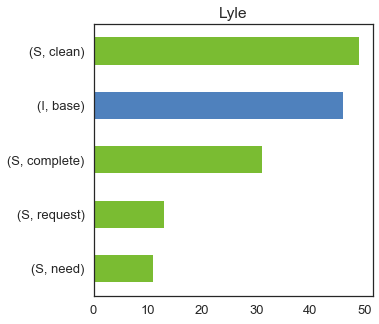

In [121]:
df['Description'][df['Tech Full Name'].str.contains('Lyle Cookson').fillna(False)]

def person_tags(name, n_reps):
    isguy = df['Tech Full Name'].str.contains(name).fillna(False)
    return tag_df.loc[isguy,(tag_df.loc[isguy,:].sum()>n_reps).values]

lyle_tags, steve_tags, andrew_tags = (person_tags('Lyle Cookson', 5),
                                      person_tags('Steve Andreozzi', 20),
                                      person_tags('Anthony Paolillo', 10))

# Glyle, *_ = tag_df_network(lyle_tags)
# Gsteve, *_ = tag_df_network(steve_tags)
# Gandrew, *_ = tag_df_network(andrew_tags)
mach_df = person_tags('Lyle Cookson',  5).sum().sort_values()
# mach_df = mach_df[mach_df>=5]
# with sns.axes_style('whitegrid') as style,\
# sns.plotting_context('poster') as context:
plt.figure(figsize=(5,5))
mach_df.plot(kind='barh', color=[colors[i] for i in mach_df.index.get_level_values(0)])
plt.title('Lyle')

Threshold to tags happening >=5x
- we can quickly gauge the number of Lyle's *total* "base cleanings" as 45-50 

Say we want to compare with other, more "typical" technicians...
$\rightarrow$ *small problem*...

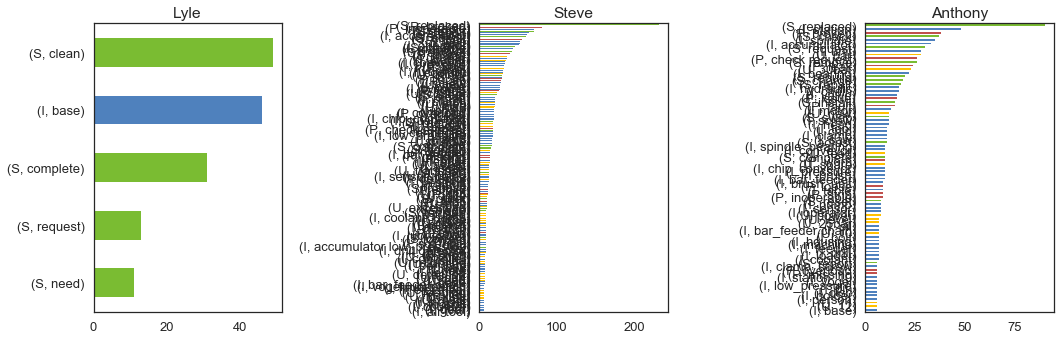

In [91]:
# with sns.axes_style('whitegrid') as style,\
# sns.plotting_context('talk') as context:
f, ax = plt.subplots(ncols=3, figsize=(15, 5))
thres = [5, 20, 10]
for n, mach in enumerate(['Lyle Cookson', 'Steve Andreozzi', 'Anthony Paolillo']):
    mach_df = person_tags(mach,  5).sum().sort_values()
#         mach_df = mach_df[mach_df>=5]
    mach_df.plot(kind='barh', color=[colors[i] for i in mach_df.index.get_level_values(0)], ax=ax[n])
    ax[n].set_title(mach.split(' ')[0])
plt.tight_layout()

In [133]:
%%output size=150 backend='bokeh' filename='techs'
%%opts Graph (edge_line_width=4 node_line_color='white', node_size=1)
%%opts EdgePaths [color_index='weight'] (line_width=1, cmap='viridis', color='dodgerblue', alpha=.2)
%%opts Overlay [width=300 legend_position='top_right'] Layout [tabs=True]
%%opts Nodes (size='size' line_color='white')
padding = dict(x=(-0.05, 1.05), y=(-0.05, 1.05))


kws = {'layout':nx.drawing.spring_layout, 
#        'layout_kws':{'prog':'neatopusher'} 
       'padding':dict(x=(-0.05, 1.05), y=(-0.05, 1.05))
      }
layout = hv.Layout([hv_net(person_tags('Lyle Cookson', 1), name='Lyle',**kws),
                    hv_net(person_tags('Steve Andreozzi', 20), name='Steve',**kws),
                    hv_net(person_tags('Anthony Paolillo', 10), name='Anthony',**kws),
                    hv_net(person_tags("Norm Neveux", 1), name='Norm',**kws),
                    hv_net(person_tags("Doug Patrick", 1), name='Doug',**kws),
                    hv_net(person_tags("Colin Doherty", 5), name='Colin',**kws)
                   ])#.cols(1)
# print(layout)
layout
# graph.edgepaths*graph.nodes

:Layout
   .Lyle.I    :Overlay
      .EdgePaths.I :EdgePaths   [x,y]
      .Lyle.I      :Nodes   [x,y,index]   (count,size,NE)
      .Lyle.S      :Nodes   [x,y,index]   (count,size,NE)
      .Lyle.U      :Nodes   [x,y,index]   (count,size,NE)
      .Lyle.P      :Nodes   [x,y,index]   (count,size,NE)
      .Text.I      :Text   [x,y]
      .Text.II     :Text   [x,y]
      .Text.III    :Text   [x,y]
      .Text.IV     :Text   [x,y]
      .Text.V      :Text   [x,y]
      .Text.VI     :Text   [x,y]
      .Text.VII    :Text   [x,y]
      .Text.VIII   :Text   [x,y]
      .Text.IX     :Text   [x,y]
      .Text.X      :Text   [x,y]
      .Text.XI     :Text   [x,y]
      .Text.XII    :Text   [x,y]
      .Text.XIII   :Text   [x,y]
      .Text.XIV    :Text   [x,y]
      .Text.XV     :Text   [x,y]
      .Text.XVI    :Text   [x,y]
      .Text.XVII   :Text   [x,y]
      .Text.XVIII  :Text   [x,y]
      .Text.XIX    :Text   [x,y]
      .Text.XX     :Text   [x,y]
      .Text.XXI    :Text   [x,y]
   .Steve.I   :Overlay
      .EdgePaths.I  :EdgePaths   [x,y]
      .Steve.U      :Nodes   [x,y,index]   (count,size,NE)
      .Steve.I      :Nodes   [x,y,index]   (count,size,NE)
      .Steve.S      :Nodes   [x,y,index]   (count,size,NE)
      .Steve.P      :Nodes   [x,y,index]   (count,size,NE)
      .Text.I       :Text   [x,y]
      .Text.II      :Text   [x,y]
      .Text.III     :Text   [x,y]
      .Text.IV      :Text   [x,y]
      .Text.V       :Text   [x,y]
      .Text.VI      :Text   [x,y]
      .Text.VII     :Text   [x,y]
      .Text.VIII    :Text   [x,y]
      .Text.IX      :Text   [x,y]
      .Text.X       :Text   [x,y]
      .Text.XI      :Text   [x,y]
      .Text.XII     :Text   [x,y]
      .Text.XIII    :Text   [x,y]
      .Text.XIV     :Text   [x,y]
      .Text.XV      :Text   [x,y]
      .Text.XVI     :Text   [x,y]
      .Text.XVII    :Text   [x,y]
      .Text.XVIII   :Text   [x,y]
      .Text.XIX     :Text   [x,y]
      .Text.XX      :Text   [x,y]
      .Text.XXI     :Text   [x,y]
      .Text.XXII    :Text   [x,y]
      .Text.XXIII   :Text   [x,y]
      .Text.XXIV    :Text   [x,y]
      .Text.XXV     :Text   [x,y]
      .Text.XXVI    :Text   [x,y]
      .Text.XXVII   :Text   [x,y]
      .Text.XXVIII  :Text   [x,y]
      .Text.XXIX    :Text   [x,y]
      .Text.XXX     :Text   [x,y]
      .Text.XXXI    :Text   [x,y]
      .Text.XXXII   :Text   [x,y]
      .Text.XXXIII  :Text   [x,y]
      .Text.XXXIV   :Text   [x,y]
      .Text.XXXV    :Text   [x,y]
      .Text.XXXVI   :Text   [x,y]
      .Text.XXXVII  :Text   [x,y]
      .Text.XXXVIII :Text   [x,y]
      .Text.XXXIX   :Text   [x,y]
      .Text.XL      :Text   [x,y]
      .Text.XLI     :Text   [x,y]
      .Text.XLII    :Text   [x,y]
      .Text.XLIII   :Text   [x,y]
   .Anthony.I :Overlay
      .EdgePaths.I :EdgePaths   [x,y]
      .Anthony.U   :Nodes   [x,y,index]   (count,size,NE)
      .Anthony.I   :Nodes   [x,y,index]   (count,size,NE)
      .Anthony.S   :Nodes   [x,y,index]   (count,size,NE)
      .Anthony.P   :Nodes   [x,y,index]   (count,size,NE)
      .Text.I      :Text   [x,y]
      .Text.II     :Text   [x,y]
      .Text.III    :Text   [x,y]
      .Text.IV     :Text   [x,y]
      .Text.V      :Text   [x,y]
      .Text.VI     :Text   [x,y]
      .Text.VII    :Text   [x,y]
      .Text.VIII   :Text   [x,y]
      .Text.IX     :Text   [x,y]
      .Text.X      :Text   [x,y]
      .Text.XI     :Text   [x,y]
      .Text.XII    :Text   [x,y]
      .Text.XIII   :Text   [x,y]
      .Text.XIV    :Text   [x,y]
      .Text.XV     :Text   [x,y]
      .Text.XVI    :Text   [x,y]
      .Text.XVII   :Text   [x,y]
      .Text.XVIII  :Text   [x,y]
      .Text.XIX    :Text   [x,y]
      .Text.XX     :Text   [x,y]
      .Text.XXI    :Text   [x,y]
      .Text.XXII   :Text   [x,y]
      .Text.XXIII  :Text   [x,y]
      .Text.XXIV   :Text   [x,y]
      .Text.XXV    :Text   [x,y]
      .Text.XXVI   :Text   [x,y]
      .Text.XXVII  :Text   [x,y]
      .Text.XXVIII :Text   [x,y]
      .Text.XXIX   :Text   [x

## Finding & Tracking Hot-spots
HVAC Case study

In [146]:
data_dir = module_path/'data'/'hvac_data'
df = pd.read_csv(data_dir/'hvac_data.csv')
# really important things we know, a priori
special_replace={'action taken:': '',
                 ' -': '; ',
                 '- ': '; ',
                 'too hot': 'too_hot',
                 'to hot': 'too_hot',
                 'too cold': 'too_cold',
                 'to cold': 'too_cold'}

nlp_select = kex.NLPSelect(columns = ['DESCRIPTION', 'LONG_DESCRIPTION'], special_replace=special_replace)
raw_text = nlp_select.transform(df)#.compute()



tex = kex.TokenExtractor()
toks = tex.fit_transform(raw_text)
# print(tex.vocab_)

vocab_fname = data_dir/'vocab.csv'
vocab = kex.generate_vocabulary_df(tex, init=vocab_fname)
tag_df = kex.tag_extractor(tex, raw_text, vocab_df=vocab)

intialized successfully!
intialized successfully!


Text(0.5,0.98,'Tag Occurence')

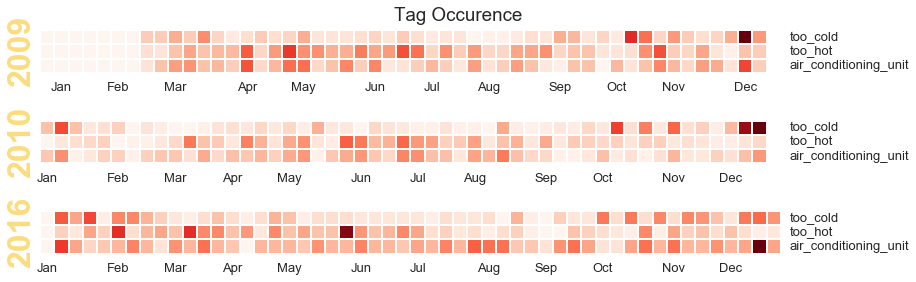

In [151]:
from mlp import plot
idx_col = pd.DatetimeIndex(df.REPORTDATE)
samp = ['air_conditioning_unit', 'too_hot', 'too_cold']
cond = (tag_df.P.alarm==1)
sample_tag = tag_df.loc[:,(slice(None), samp)]
sample_tag.columns = sample_tag.columns.droplevel(0)

sample_tag = sample_tag.set_index(idx_col[:])

sample_tag = sample_tag[ sample_tag.index.year.isin([2009, 2010, 2016])]
plot.calendarplot(sample_tag,
                  how='sum', fig_kws={'figsize':(13,4)});
plt.suptitle('Tag Occurence')

Text(0.5,1,'Monthly tag-occurence estimate')

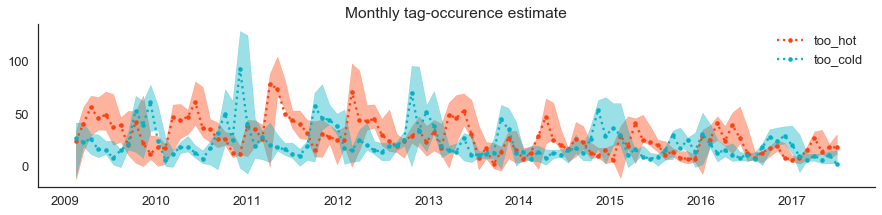

In [155]:
# .rolling(1000).sum()
samp = ['too_cold', 'too_hot']
sample_tag = tag_df.loc[:,(slice(None), samp)]
sample_tag.columns = sample_tag.columns.droplevel(0)

sample_tag = sample_tag.set_index(idx_col).sort_index()

# with sns.axes_style('darkgrid') as style,\
# sns.plotting_context('poster') as context:
plt.figure(figsize=(15,3))
sample_tag.resample('30D').sum()
plt.plot(sample_tag.too_hot.resample('30D').sum(), 
         marker='.', ls=':', color='xkcd:orangered', label='too_hot')
plt.plot(sample_tag.too_cold.resample('30D').sum(), 
         marker='.', ls=':', color='xkcd:turquoise blue', label='too_cold')
roll = sample_tag.rolling('30D').sum()
mean = roll.resample('30D').mean()
err = roll.resample('30D').std()
plt.fill_between(mean.index, mean.too_hot-3*err.too_hot, mean.too_hot+3*err.too_hot,
                alpha=.4, color='xkcd:orangered')
plt.fill_between(mean.index, mean.too_cold-3*err.too_cold, mean.too_cold+3*err.too_cold,
                alpha=.4, color='xkcd:turquoise blue')
sns.despine()
plt.legend()
plt.title('Monthly tag-occurence estimate')

In [158]:
%%output size=250 
# %%opts Spread [width=300, height=80] (line_color=None, alpha=.4 color=hv.Cycle(['#fe420f', '#06b1c4']))
# %%opts Curve (color=hv.Cycle(['#fe420f', '#06b1c4']) line_dash='dotted')
# %%opts Scatter ( size=5, color=hv.Cycle(['#fe420f', '#06b1c4']))

temp_curve_spec = {
    'Spread':{'plot':{'width':300, 'height':80}, 
              'style':dict(line_color=None, alpha=.4, color=hv.Cycle(['#fe420f', '#06b1c4']))},
    'Curve':{'style':dict(color=hv.Cycle(['#fe420f', '#06b1c4']), line_dash='dotted')},
    'Scatter':{'style':dict( size=5, color=hv.Cycle(['#fe420f', '#06b1c4']))}
}

samp = ['too_cold', 'too_hot']
sample_tag = tag_df.loc[:,(slice(None), samp)]
sample_tag.columns = sample_tag.columns.droplevel(0)

sample_tag = sample_tag.set_index(idx_col).sort_index()
meas = sample_tag.resample('30D').sum()
roll = sample_tag.rolling('30D').sum()
mean = roll.resample('30D').mean()
err = roll.resample('30D').std()
    
temp_curves = hv.Overlay([hv.Spread((mean.index, mean.too_hot, 2*err.too_hot)),
                          hv.Spread((mean.index, mean.too_cold, 2*err.too_cold)),
                          hv.Curve((meas.index, meas.too_hot)),
                          hv.Curve((meas.index, meas.too_cold)),
                          hv.Scatter((meas.index, meas.too_hot), label='too_hot'),
                          hv.Scatter((meas.index, meas.too_cold), label='too_cold')])
# temp_curves.opts(temp_curve_spec)#*hv.VLine(times[5])

In [162]:
import geopandas as gpd 
import geoviews as gv
nist_df = gpd.read_file(str(data_dir/'nist_map.geojson')).set_index('bldg', drop=False)
nist_df.index = nist_df.index.astype(str)
samp = ['too_cold', 'too_hot']
sample_tag = tag_df.loc[:,(slice(None), samp)]
sample_tag.columns = sample_tag.columns.droplevel(0)

bldg_col = df.LOCATION.str.split('-').str[0].astype('category')
sample_tag = pd.concat([sample_tag, bldg_col], axis=1)
sample_tag = sample_tag.set_index(idx_col).sort_index()
sample_tag.rename({'LOCATION':'bldg'}, axis='columns', inplace=True)

times = sample_tag.resample('30D').sum().index
# pd.concat([sample_tag.loc[times[0]:times[1]].groupby('bldg').sum(), nist_df], axis=1).dropna()

def get_bldg_temp(n):
    data = gpd.GeoDataFrame(pd.concat([sample_tag.loc[times[n]:times[n+1]].groupby('bldg').sum(), 
                      nist_df], 
                     axis=1).dropna())
    data['Temperature Index'] = np.tanh((data['too_cold'].sum()+data['too_hot'].sum())/20)*\
    (data['too_cold'] - data['too_hot'])
    return data
# np.tanh((data['too_cold'].sum()+data['too_hot'].sum())/20)*\
get_bldg_temp(1).head()

too_hot  too_cold   bldg  \
bldg                             
101         2         3  101.0   
202         0         1  202.0   
203         0         0  203.0   
205         0         0  205.0   
215         1         0  215.0   

                                               geometry  Temperature Index  
bldg                                                                        
101   POLYGON ((-77.2163987159729 39.13512015465694,...           0.995524  
202   POLYGON ((-77.22025036811827 39.13047428646352...           0.995524  
203   POLYGON ((-77.22077608108521 39.13020796677279...           0.000000  
205   POLYGON ((-77.21850156784058 39.1223198699503,...           0.000000  
215   POLYGON ((-77.21671521663666 39.1316623096919,...          -0.995524

In [164]:
%%output size=200
# gv.Polygons(get_bldg_temp(0))
# gv.Polygons(nist_df)
from bokeh.palettes import Viridis10, Category10_6, RdBu10
from bokeh.models.mappers import LinearColorMapper
RdBu10.reverse()

padding = dict(x=(-77.223, -77.214), y=(39.13, 39.14))
extents = (-77.223, 39.129, -77.214, 39.1385)

bldg_dict, vlines = {}, {}
for n, time in enumerate(times[:-1]):
    mapped = gv.Polygons(get_bldg_temp(n), 
                         vdims=['Temperature Index', 'bldg', 'too_hot', 'too_cold'],
                         extents = extents)
    mapped = mapped.redim.range(**padding)
    vlines[time] = hv.VLine(time).opts(style={'color':'black'})
    bldg_dict[time] = mapped
    
text = hv.Overlay([gv.Text(i.centroid.x-.0002, 
                           i.centroid.y-.00015, 
                           str(name)) for name,i in get_bldg_temp(0).geometry.iteritems()])
# hv.HeatMap()
# RdBu.reverse()

# color_mapper = LinearColorMapper(palette=RdBu[10].reverse(), low=-5, high=5)


# bldg_dict[times[0]]*text

In [166]:
%%output size=150 filename='nist_hvac_map'
%%opts Polygons [height=350 width=300, tools=['hover'] colorbar=False ] (cmap='RdBu')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# , bounds = (-77.222, 39.13, -77.215, 39.14)
# bldg_dict[times[11]].cols(1)
# hv.HoloMap(bldg_dict)

(hv.HoloMap(bldg_dict, 'Time')*text + hv.HoloMap(vlines, 'Time')*temp_curves.opts(temp_curve_spec)).cols(1)

:Layout
   .HoloMap.I  :HoloMap   [Time]
      :Overlay
         .Polygons.I  :Polygons   [Longitude,Latitude]   (Temperature Index,bldg,too_hot,too_cold)
         .Text.I      :Text   [x,y]
         .Text.II     :Text   [x,y]
         .Text.III    :Text   [x,y]
         .Text.IV     :Text   [x,y]
         .Text.V      :Text   [x,y]
         .Text.VI     :Text   [x,y]
         .Text.VII    :Text   [x,y]
         .Text.VIII   :Text   [x,y]
         .Text.IX     :Text   [x,y]
         .Text.X      :Text   [x,y]
         .Text.XI     :Text   [x,y]
         .Text.XII    :Text   [x,y]
         .Text.XIII   :Text   [x,y]
         .Text.XIV    :Text   [x,y]
         .Text.XV     :Text   [x,y]
         .Text.XVI    :Text   [x,y]
         .Text.XVII   :Text   [x,y]
         .Text.XVIII  :Text   [x,y]
         .Text.XIX    :Text   [x,y]
         .Text.XX     :Text   [x,y]
         .Text.XXI    :Text   [x,y]
         .Text.XXII   :Text   [x,y]
         .Text.XXIII  :Text   [x,y]
         .Text.XXIV   :Text   [x,y]
         .Text.XXV    :Text   [x,y]
         .Text.XXVI   :Text   [x,y]
         .Text.XXVII  :Text   [x,y]
         .Text.XXVIII :Text   [x,y]
         .Text.XXIX   :Text   [x,y]
         .Text.XXX    :Text   [x,y]
   .HoloMap.II :HoloMap   [Time]
      :Overlay
         .VLine.I          :VLine   [x,y]
         .Spread.I         :Spread   [x]   (y,yerror)
         .Spread.II        :Spread   [x]   (y,yerror)
         .Curve.I          :Curve   [x]   (y)
         .Curve.II         :Curve   [x]   (y)
         .Scatter.Too_hot  :Scatter   [x]   (y)
         .Scatter.Too_cold :Scatter   [x]   (y)

# Questions/Comments?